<a href="https://colab.research.google.com/github/andrelbourgeois/CASA0018/blob/main/practiceDL_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.11.0
shape:  (28, 28)
label:  5
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 24)                18840     
                                                                 
 dense_5 (Dense)             (None, 10)                250       
                                                                 
Total params: 19,090
Trainable params: 19,090
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3811 - accuracy: 0.8945
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2188 - accuracy: 0.9374
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 

[0.13582339882850647, 0.9599000215530396]

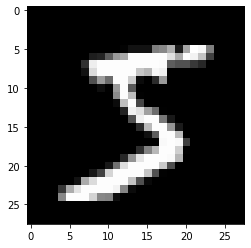

In [4]:
#imports
import tensorflow as tf
import matplotlib.pyplot as plt

#check tensorflow version
print(tf.__version__)

#load dataset
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

#create a variable to sample the dataset
sample = 0
print("shape: ", training_images[sample].shape)
plt.imshow(training_images[sample], cmap="gray")
print("label: ", training_labels[sample])

#normalize data
training_images = training_images / 255
test_images = test_images / 255

#build the model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(24, activation=tf.nn.relu),
                                    #last layer should have as many nodes as outputs
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.summary()

#compile the model - optimizer and loss function
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

#train the model
model.fit(training_images, training_labels, epochs=10)

#evaluate the model
model.evaluate(test_images, test_labels)
